# `1.` **`Model Structure`** <a class="anchor" id="1"></a>

### `Import Libraries`

In [53]:
import os #Os module for operating system related functionalities
import cv2 #cv2 module for computer vision tasks using OpenCV
import imageio  #Imageio module for reading and writing images
from keras.layers import Dense  #Import the Dense layer from Keras for fully connected layers
from keras.layers import Conv2D  #Import the Conv2D layer from Keras for convolutional layers
from keras.layers import Flatten  #Import the Flatten layer from Keras for flattening the input
from keras.layers import MaxPool2D  #Import the MaxPool2D layer from Keras for max pooling
from keras.models import Sequential  #Import the Sequential model from Keras for linear stack of layers
from tensorflow.keras.models import Model  #Import the Model class from TensorFlow Keras for defining models
from keras.applications.vgg19 import VGG19  #Import the VGG19 model from Keras applications
from keras.applications.xception import Xception  #Import the Xception model from Keras applications
from tensorflow.keras.applications.resnet50 import ResNet50  #Import the ResNet50 model from TensorFlow Keras applications
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input  #Import the VGG16 model and preprocess_input function from TensorFlow Keras applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array  #Import the load_img and img_to_array functions from TensorFlow Keras preprocessing

## `Feature Extract using VGG-19`:

## Introduction on VGGNet
VGG19 is a convolutional neural network (CNN) architecture that was developed by the Visual Geometry Group (VGG) at the University of Oxford. It is an extension of the VGG16 model and was introduced as a part of the ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) in 2014. VGG19 achieved outstanding performance in image classification tasks and became one of the influential models in the field of deep learning.


The name "VGG19" represents the model's architecture, which consists of 19 layers, including convolutional layers, pooling layers, and fully connected layers. VGG19 is known for its simplicity and uniformity in architecture, which makes it easier to understand and reproduce compared to more complex models.



<a href="http://ethereon.github.io/netscope/#/gist/dc5003de6943ea5a6b8b" target="_blank">Network Structure of VGG19</a>

## The network structure
The architecture of VGG19 is characterized by its deep stack of convolutional layers, where the depth of the network plays a crucial role in capturing complex image features. Here is a breakdown of the VGG19 architecture:

- **16 convolutional layers.**
- **5 max-pooling layers.**
- **3 fully connected layers.**


- Convolutional Layers: VGG19 consists of a total of 16 convolutional layers. These layers are responsible for extracting features from the input image. The majority of the convolutional layers in VGG19 have a kernel size of 3x3.

- Max Pooling Layers: VGG19 includes 5 max pooling layers. These layers reduce the spatial dimensions of the feature maps, helping to downsample the information and retain the most salient features.

- Fully Connected Layers: VGG19 has 3 fully connected layers. These layers are typically located at the end of the network and are responsible for the final classification or regression tasks. In the case of VGG19, the fully connected layers are used for image classification into 1,000 categories in the ImageNet dataset.

The following figure is VGG Structure diagram:


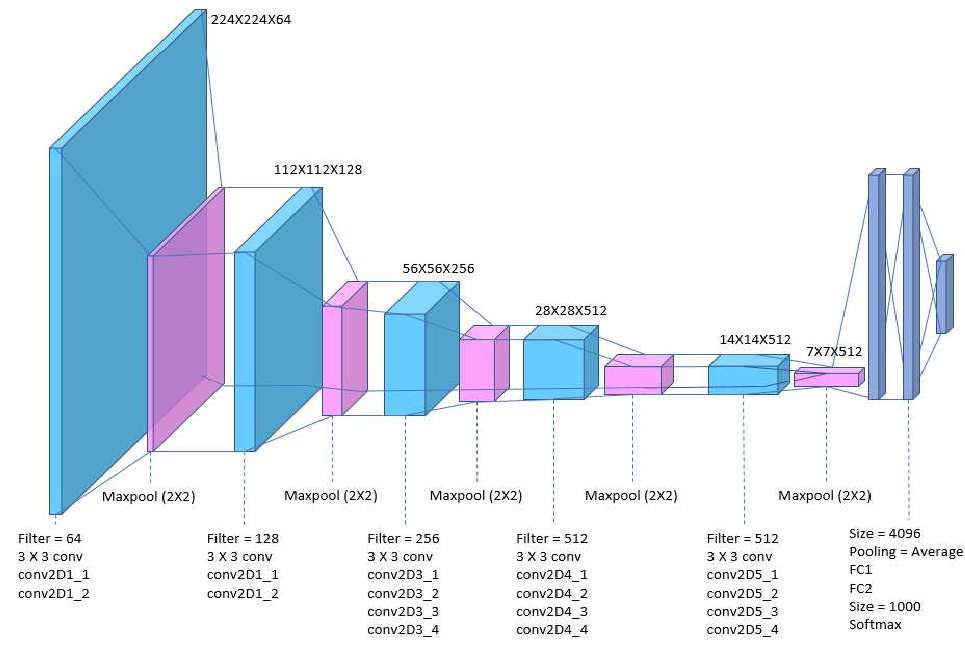

## `Feature Extract using VGG19`:

In [54]:
# Load the model 
# It means that the fully connected layers at the top of the network will not be included.
# The parameter weights='imagenet' in the VGG19 model configuration specifies the weight initialization to be used in the model.
# In this case, 'imagenet' refers to the pre-trained weights that were trained on the ImageNet dataset.
model_vgg19 = VGG19(weights= 'imagenet', include_top=False, input_shape=(224,224,3))
model_VGG19 = Model(inputs = model_vgg19.input, outputs = model_vgg19.get_layer("block5_pool").output)
# Summary: Is used to display a summary of the model architecture, including the number of parameters and the shape of the output at each layer.
print(model_vgg19.summary())
# We wil take untill the fully connected layer , we do not need the last layer.

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [55]:
def extract_features_VGG19 (directory):  
    features = dict() # Extract features from each photo
    for name in os.listdir (directory):        
        filename = directory+ '/'+ name # Get the image from file
        image = load_img(filename, target_size=(224, 224))
        image = img_to_array(image) # Converts the input image into a NumPy array format.
        # Reshapes the image array to match the expected input shape of the model, VGG19 take the image as 224*224 dimension
        # Parameter 1: At each time ,we are only process one image. (Number of samples)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) 
        # Used to preprocess the input image before feeding it into the VGG16 model.
        image = preprocess_input(image)
        # Get features
        # By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
        feature = model_VGG19.predict(image, verbose=1)
        print(feature.shape)
        # Get image id , make a dictionary each index (Key= id of image, Value= feature of the image)
        imgID = name.split('.')[0]
        features[imgID] = feature
    return features

In [56]:
folder_name = "C:\\Users\\Nobita\\Desktop\\images"
image_features = extract_features_VGG19(folder_name)

1/1 [==============================] - 0s 306ms/step
(1, 7, 7, 512)
1/1 [==============================] - 0s 176ms/step
(1, 7, 7, 512)
1/1 [==============================] - 0s 177ms/step
(1, 7, 7, 512)


In [57]:
image_features

{'1': array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.92001355,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            1.437628  ,  0.        ],
          ...,
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.59568053,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            2.1166115 ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            8.992489  ,  0.        ]],
 
         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          ...,
        

In [58]:
image_features['1'].shape

(1, 7, 7, 512)

---

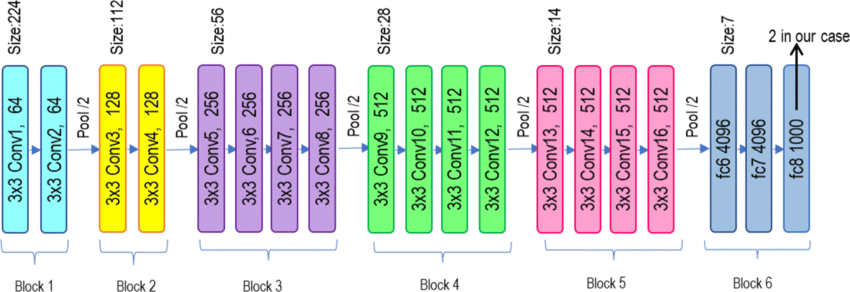

In [59]:
"""
1. Convolutional Layers:

    - There are a total of 16 convolutional layers in VGG19.
    - The feature map size is reduced after each convolutional layer.
    - The kernel size for all the convolutional layers is 3x3.
    - The stride for all the convolutional layers is 1.
    - The activation function used is the Rectified Linear Unit (ReLU).
    
    
2. Pooling Layers:

    - VGG19 includes 5 max pooling layers.
    - The max pooling layers follow certain convolutional layers to downsample the feature maps.
    - The pooling operation reduces the spatial dimensions of the feature maps while retaining the most salient features.
    - The pool size for all the max pooling layers is 2x2.
    - The stride for all the max pooling layers is 2, meaning the pooling window moves by 2 pixels horizontally and vertically.
"""



model_vgg19 = Sequential()
# ================================ First Block ================================
model_vgg19.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu", name="conv1.1"))
model_vgg19.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", name="conv1.2"))
model_vgg19.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-1"))
# ================================ Second Block ================================
model_vgg19.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name="conv2.1"))
model_vgg19.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name="conv2.2"))
model_vgg19.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-2"))
# ================================ Third Block ================================
model_vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv3.1"))
model_vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv3.2"))
model_vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv3.3"))
model_vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv3.4"))
model_vgg19.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-3"))
# ================================ Forth Block ================================
model_vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv4.1"))
model_vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv4.2"))
model_vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv4.3"))
model_vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv4.4"))
model_vgg19.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-4"))
# ================================ Fifth Block ================================
model_vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv5.1"))
model_vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv5.2"))
model_vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv5.3"))
model_vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv5.4"))
model_vgg19.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-5"))